<a href="https://colab.research.google.com/github/samservo09/bioinformatics-bipolar-drug-discovery/blob/main/4-model-building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioinformatics: Drug discovery on Norepinephrine transporter protein

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load the dataset

**Lipinski descriptor:** provides simple molecular descriptors that will give quick overview of the drug-like properties of the molecule; global features of the molecules. <br>
**Pubchem fingerprints:** describing the local features of the molecules; each molecule will be described by their unique building blocks.

Each molecule will comprise of several building blocks and the way they are connected will create unique properties for the drug which is the essence of drug discovery and design.

**Goal:** Find a way to rearrange the building blocks in a way that the molecule provides the most potency toward the target protein that it wants to interact while also being safe and not so toxic.

In [2]:
! wget https://raw.githubusercontent.com/samservo09/bioinformatics-bipolar-drug-discovery/refs/heads/main/data/Norepinephrine/Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-10-13 08:12:35--  https://raw.githubusercontent.com/samservo09/bioinformatics-bipolar-drug-discovery/refs/heads/main/data/Norepinephrine/Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4604664 (4.4M) [text/plain]
Saving to: ‘Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv’

Norepinephrine_bioa 100%[===================>]   4.39M  --.-KB/s    in 0.05s   

2024-10-13 08:12:35 (82.8 MB/s) - ‘Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [4604664/4604664]



In [3]:
df = pd.read_csv('Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.761954
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.207608
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.782516
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.632644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
2578,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.154902
2579,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
2580,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.700000


In [5]:
df.shape

(2582, 882)

## Features

881 input features and 1 output variable (pIC50 variable)

## Input features

In [6]:
# drop the target variable
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2578,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2579,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2580,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output features

In [7]:
Y = df.pIC50
Y

,pIC50
0,6.761954
1,9.207608
2,6.698970
3,6.782516
4,6.632644
...,...
2577,6.000000
2578,8.154902
2579,4.000000
2580,4.700000


### Check the data dimension

In [8]:
X.shape

(2582, 881)

In [9]:
Y.shape

(2582,)

### Remove the low variance features

Performing **feature selection** by removing features that have low variance, as these features are often less informative for machine learning models.

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [11]:
X.shape

(2582, 112)

## Data split (80/20)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((2065, 112), (2065,))

## Model building

In [14]:
# using Random Forest
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5733927897089208

In [15]:
# do the prediction
Y_pred = model.predict(X_test)

## Scatter plot of experimental vs predicted pIC50 values

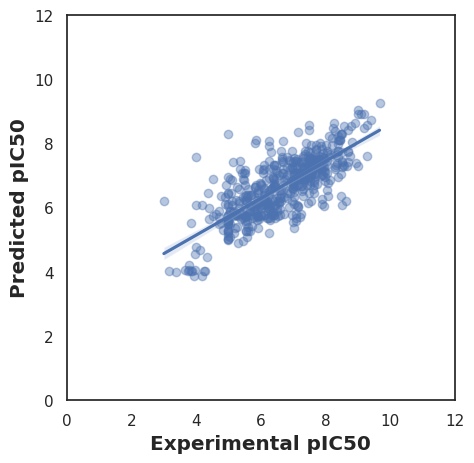

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Pass data as a dictionary or DataFrame with x and y specified
# If Y_test and Y_pred are pandas Series or numpy arrays:
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})

# If Y_test and Y_pred are part of a pandas DataFrame called 'df':
# ax = sns.regplot(x='Y_test_column_name', y='Y_pred_column_name', data=df, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

**Next step:** Experiment with other models that are potentially more fitting to this dataset.